# Preprocesamiento de los Datos

**se realizaron las siguientes tareas en el dataset a mano:**

1- Se limpio el dataset de los valores que tenian en null el pais

2- En el caso de company, los que eran nulos se seteo como 0 ya que eran 55000 registros en nulo

3- En el caso de agente se supuso que si era nulo, es que no usaba un agente para comprar el pasaje

4-En el caso de children nulo, simplemente se eliminaron esos casos ya que eran solo 4

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv("/hotels_train_limpio.csv")
print(df)


      hotel;lead_time;arrival_date_year;arrival_date_month;arrival_date_week_number;arrival_date_day_of_month;stays_in_weekend_nights;stays_in_week_nights;adults;children;babies;meal;country;market_segment;distribution_channel;is_repeated_guest;previous_cancellations;previous_bookings_not_canceled;reserved_room_type;assigned_room_type;booking_changes;deposit_type;agent;company;days_in_waiting_list;customer_type;adr;required_car_parking_spaces;total_of_special_requests;reservation_status;reservation_status_date;id;is_canceled
0      City Hotel;49;2016;September;37;5;1;2;1;0.0;0;...                                                                                                                                                                                                                                                                                                                                                                                                                             

# Vinculacion del drive al colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploracion Inicial

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv("/content/drive/MyDrive/TP 1 Datos/data/hotels_train.csv")
#df = pd.read_csv("drive/MyDrive/hotels_train.csv")
df.sample(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
10967,City Hotel,7,2016,December,51,13,0,1,1,0.0,...,NaN,174.0,0,Transient,88.0,0,0,2016-12-14,23a473de-750e-48c7-9a50-c02602cc6ba5,0
36746,Resort Hotel,223,2016,September,36,1,4,10,2,0.0,...,243.0,NaN,0,Contract,92.1,0,1,2016-09-15,e0b2f7fc-58c3-4b7b-9925-b9d4edc2cf57,0


In [ ]:
df.info()

VARIABLES CUALITATIVAS

Se observan a continuacion las variables con la distribucion segun su categoria

In [ ]:
df['hotel'].value_counts(normalize = True)

In [ ]:
df['meal'].value_counts(normalize = True)

In [ ]:
df['country'].value_counts(normalize = True)

In [ ]:
df['market_segment'].value_counts(normalize = True)

Variabeles cuantitativas:
- hotel: 68% de City Hotel y 31.9% de Resort hotel 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         61692 non-null  object 
 13  market_segment                  61913 non-null  object 
 14  distribution_channel            61913 non-null  object 
 15  is_repeated_guest               61913 non-null  int64  
 16  previous_cancellations          61913 non-null  int64  
 17  previous_bookings_not_canceled  61913 non-null  int64  
 18  reserved_room_type              61913 non-null  object 
 19  assigned_room_type              61913 non-null  object 
 20  booking_changes                 61913 non-null  int64  
 21  deposit_type                    61913 non-null  object 
 22  agent                           54023 non-null  float64
 23  company                         3152 non-null   float64
 24  days_in_waiting_list            61913 non-null  int64  
 25  customer_type                   61913 non-null  object 
 26  adr                             61913 non-null  float64
 27  required_car_parking_spaces     61913 non-null  int64  
 28  total_of_special_requests       61913 non-null  int64  
 29  reservation_status_date         61913 non-null  object 
 30  id                              61913 non-null  object 
 31  is_canceled                     61913 non-null  int64 

Se observan mucha cantidad de nulos en la variable "company" y algunos en la variable "agent" que analizaremos y muy pocos en las variables "children", "country"

notamos que la columna children deberia ser int y que tiene unos nulos, analizamos

In [ ]:
df[df['children'].isna()]

In [ ]:
df['children'].describe()

Se decide rellenar los 4 registros de children con 0 ya que es cercana a la media y convertir al tipo correcto -> int

In [ ]:
df['children'] = df['children'].fillna(0).astype(int)

In [ ]:
df.info()

In [ ]:
df.head(2)

In [ ]:
df.describe()

#Estudio de las variables

Cantidad de registros de la variable a predecir

In [ ]:
df['is_canceled'].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Se observan casi la misma cantidad para recervas canceladas como las que no

---



Analizo los casos de registros que tienen valor company distinto de nulo

In [ ]:
df_with_company = df[~df['company'].isna()]
df_with_company.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
35,Resort Hotel,364,2016,October,42,12,2,6,1,0.0,...,NaN,223.0,0,Transient-Party,60.0,0,0,2016-10-20,68deb679-eeb2-491e-98a6-0539073b4258,0
63,Resort Hotel,0,2017,April,14,3,1,0,1,0.0,...,NaN,512.0,0,Transient,45.0,0,0,2017-04-04,e2680436-2a94-4532-88f1-21f11a7af3e5,0


In [ ]:
cant_canceled_for_company = df_with_company['is_canceled'].value_counts()
cant_canceled_for_company

0    2321
1     831
Name: is_canceled, dtype: int64

In [ ]:
cant_canceled_for_company[0]/ cant_canceled_for_company[1]

2.793020457280385

<Axes: title={'center': 'cantidad de reservas segun "is_canceled"'}, xlabel='is_canceled', ylabel='cantidad de reservas'>

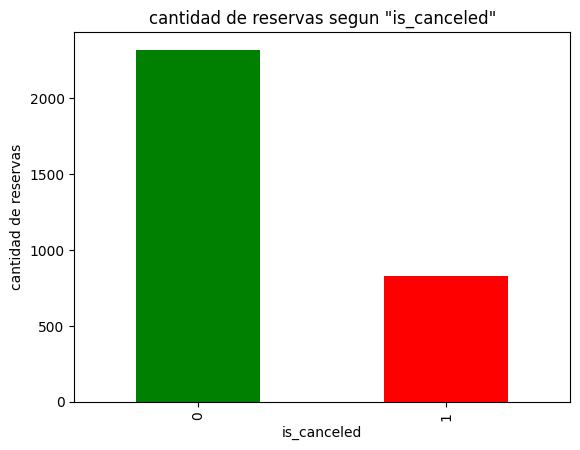

In [ ]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['g', 'r']), None,2))
cant_canceled_for_company.plot(kind = 'bar', title = 'cantidad de reservas segun "is_canceled"', xlabel = 'is_canceled', ylabel = 'cantidad de reservas', color = my_colors)

Se observa que para los registros con compañia una relacion de 2.79 en favor de los no cancelados. 
Aunque los registros con company representan muy pocos valores de la muestra

# Estudiaremos las reservas canceladas y no canceladas segun su distribucion de tiempo, es decir, por año, mes y dia

In [ ]:
df_canceled = df[df['is_canceled'] == 1]
df_not_canceled = df[df['is_canceled'] == 0]

Se muestran la cantidad de reservas canceladas por año

<Axes: title={'center': 'cantidad de reservas canceladas por año'}, xlabel='año', ylabel='cantidad de reservas canceladas'>

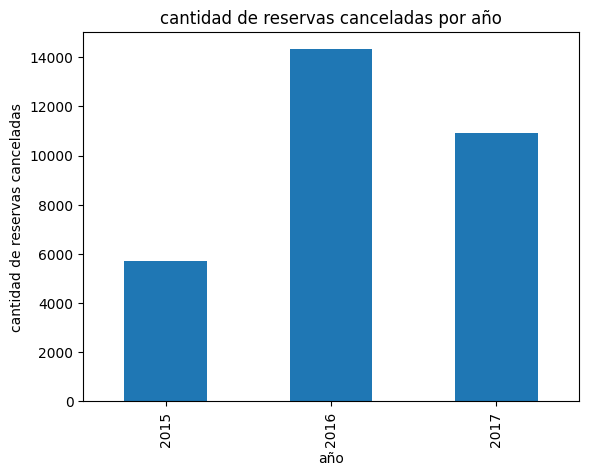

In [ ]:
df.groupby('arrival_date_year')['is_canceled'].sum().plot(kind = 'bar', title = 'cantidad de reservas canceladas por año', xlabel = 'año', ylabel='cantidad de reservas canceladas')

In [ ]:
month_list_order= ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']

<Axes: title={'center': 'cantidad de reservas canceladas por mes'}, xlabel='mes', ylabel='cantidad de reservas canceladas'>

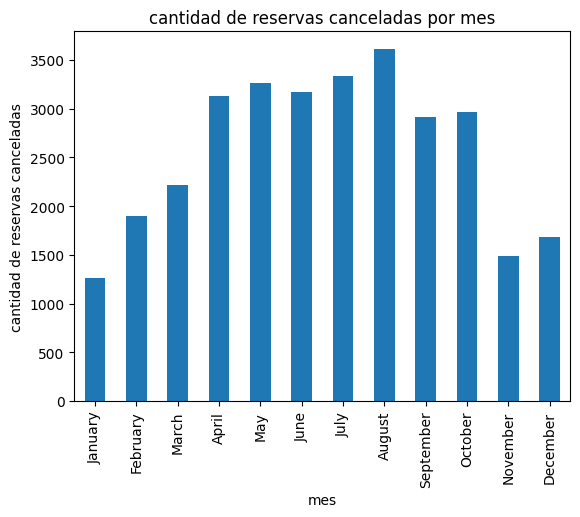

In [ ]:
df.groupby('arrival_date_month')['is_canceled'].sum().reindex(month_list_order).plot(kind = 'bar', title = 'cantidad de reservas canceladas por mes', xlabel = 'mes', ylabel='cantidad de reservas canceladas')

<Axes: xlabel='arrival_date_year', ylabel='arrival_date_month'>

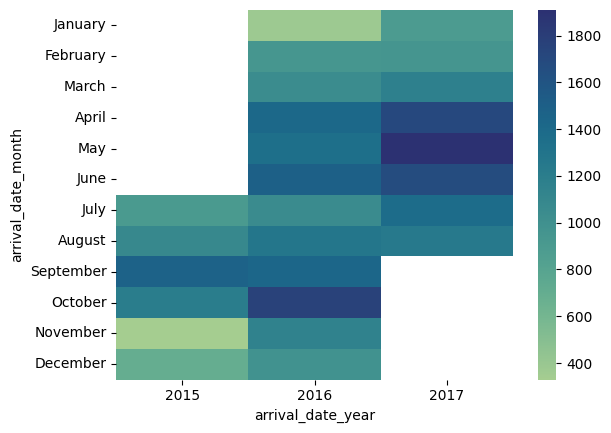

In [ ]:
sns.heatmap(df.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].sum().reset_index().pivot("arrival_date_month", "arrival_date_year", "is_canceled").reindex(month_list_order), cmap="crest")

Se observan que los datos ingresados son a partir de Julio de 2015 a agosto de 2017. Como tambien la mayor cantidad de reservas canceladas se presentan en Octubre de 2016, abril y mayo de 2017. Y las menores reservas canceladas en moviembre de 2015 y enero de 2016

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


# Country

In [ ]:
# cantidad de paises
country_values = df['country'].value_counts()
country_values

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [ ]:
country_values.describe()

count      149.000000
mean       414.040268
std       2402.160955
min          1.000000
25%          3.000000
50%         12.000000
75%         45.000000
max      27950.000000
Name: country, dtype: float64

In [ ]:
# paises con mas registros que la media
country_More_than_mean = country_values[country_values > country_values.mean()]
country_More_than_mean

In [ ]:
sns.barplot(data = country_More_than_mean.reset_index(),x = 'index' , y = 'country')
plt.ylabel('cantidad')
plt.xlabel('pais')
plt.title('cantidad de registros por pais')
plt.show()

In [ ]:
#filtro por los registros con los paises mayores a la media
sns.histplot(data=df[df['country'].isin(country_More_than_mean.reset_index()['index'])], x="country", hue="is_canceled", multiple="dodge", shrink=.8)
 
plt.ylabel('cantidad')
plt.xlabel('pais')
plt.title('cantidad de registros por pais')
plt.show()

# Analisis por cantidad de personas

In [ ]:
df_cant_personas = df[['adults', 'children', 'babies', 'is_canceled']]
df_cant_personas.sample(2)

,adults,children,babies,is_canceled
33383,2,0.0,0,1
5541,2,0.0,0,1


In [ ]:
df_cant_personas[df_cant_personas['babies']>df_cant_personas['adults']]

,adults,children,babies,is_canceled
12659,1,0.0,9,0
41018,0,2.0,1,1


In [ ]:
df_cant_personas[df_cant_personas['children'] >df_cant_personas['adults']]

,adults,children,babies,is_canceled
96,0,2.0,0,1
212,0,2.0,0,1
326,0,2.0,0,0
481,2,3.0,0,0
669,2,3.0,0,1
...,...,...,...,...
60994,0,2.0,0,0
61298,0,2.0,0,0
61573,1,2.0,0,1
61604,1,2.0,0,0


In [ ]:
df_cant_personas[df_cant_personas['babies'] + df_cant_personas['children'] >df_cant_personas['adults']]

,adults,children,babies,is_canceled
96,0,2.0,0,1
212,0,2.0,0,1
326,0,2.0,0,0
481,2,3.0,0,0
669,2,3.0,0,1
...,...,...,...,...
60998,2,2.0,1,0
61298,0,2.0,0,0
61573,1,2.0,0,1
61604,1,2.0,0,0


In [ ]:
df_cant_personas['children'].value_counts()

0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

In [ ]:
df[df['children']>9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10.0,...,8.0,NaN,0,Contract,133.16,0,1,2015-07-12,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


In [ ]:
df_cant_personas

,adults,children,babies,is_canceled
0,1,0.0,0,1
1,2,0.0,0,0
2,2,2.0,0,0
3,2,0.0,0,1
4,2,0.0,0,0
...,...,...,...,...
61908,2,0.0,0,1
61909,1,0.0,0,0
61910,1,0.0,0,0
61911,2,0.0,0,1


# Análisis de Correlacion entre Variables

para ello se buscara hallar la covarianza del dataset con cada variable

In [32]:
df.cov(numeric_only= True)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,12258.465118,1.818502,201.862627,-6.755375,6.538163,29.240236,7.235679,-2.054316,-0.233379,-1.972980,10.411942,-10.528775,-1.334055,-962.055439,1655.706735,343.075082,-499.994682,-2.784139,-10.539204,16.265487
arrival_date_year,1.818502,0.501815,-5.179294,0.014490,0.019041,0.054483,0.011090,0.016954,-0.000897,-0.000536,-0.100123,0.026815,0.011800,6.317823,22.581197,-0.771887,7.355174,-0.001819,0.059268,0.007057
arrival_date_week_number,201.862627,-5.179294,182.952957,6.868022,0.189758,0.311042,0.206254,0.034630,0.020212,-0.049165,0.611967,-0.451341,0.099807,-63.737370,-81.997347,4.867659,48.723868,0.004256,0.307129,0.056522
arrival_date_day_of_month,-6.755375,0.014490,6.868022,77.360619,-0.135548,-0.438496,0.012687,0.049574,0.002082,-0.007588,-0.301683,-0.024881,0.051129,2.509370,53.962390,4.545072,14.153569,0.000573,0.052814,-0.032414
stays_in_weekend_nights,6.538163,0.019041,0.189758,-0.135548,0.986249,0.914826,0.048787,0.020798,0.002013,-0.013172,-0.010964,-0.052637,0.026528,16.571829,6.628608,-1.063376,2.899560,-0.003123,0.055560,0.000635
stays_in_week_nights,29.240236,0.054483,0.311042,-0.438496,0.914826,3.552946,0.097702,0.044253,0.003716,-0.027473,-0.025132,-0.118941,0.080663,40.993838,44.734971,-0.145275,7.463522,-0.009022,0.107217,0.026803
adults,7.235679,0.011090,0.206254,0.012687,0.048787,0.097702,0.346999,0.006933,0.000804,-0.012554,-0.001871,-0.079702,-0.016320,-1.643773,11.496075,-0.103322,6.232389,0.001379,0.049148,0.017725
children,-2.054316,0.016954,0.034630,0.049574,0.020798,0.044253,0.006933,0.162286,0.001075,-0.001983,-0.010927,-0.011074,0.014480,2.563046,0.726397,-0.266131,6.742575,0.004031,0.024995,0.001257
babies,-0.233379,-0.000897,0.020212,0.002082,0.002013,0.003716,0.000804,0.001075,0.008493,-0.000136,-0.000708,-0.000745,0.004962,0.367992,0.199641,-0.018640,0.148478,0.000741,0.006671,-0.001476
is_repeated_guest,-1.972980,-0.000536,-0.049165,-0.007588,-0.013172,-0.027473,-0.012554,-0.001983,-0.000136,0.027208,0.012454,0.093519,0.000847,0.237319,-12.651371,-0.067036,-1.041904,0.002688,0.002042,-0.007463


In [33]:
#df.loc["lead_time", "is_canceled"]

KeyError: ignored